**FETAL HEALTH CLASSIFICATION PROBLEM**

> 
Classification of fetal health to avoid the abnormalities for the child and mother while giving birth.

> Different classification algorithms are trained on data consisting of 22 columns. Out of total 22 columns the first 21 columns are the
factors based on which we classify the fetal health which is the last column.

> We classify the health status into the following:
1.0-Normal
2.0-Suspect
3.0-Pathological

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
#data = open(r"C:\Users\owaisaaa\Desktop\Data_Analytics_EduBrige\Classification_Problem\fetal_health.csv")
#df = pd.read_csv(data, low_memory=False)
df = pd.read_csv(r'fetal_health.csv', low_memory=False)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [10]:
print(f"The dataset shape: {df.shape}")

The dataset shape: (2126, 22)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7de870dd0>,
      dtype=object)

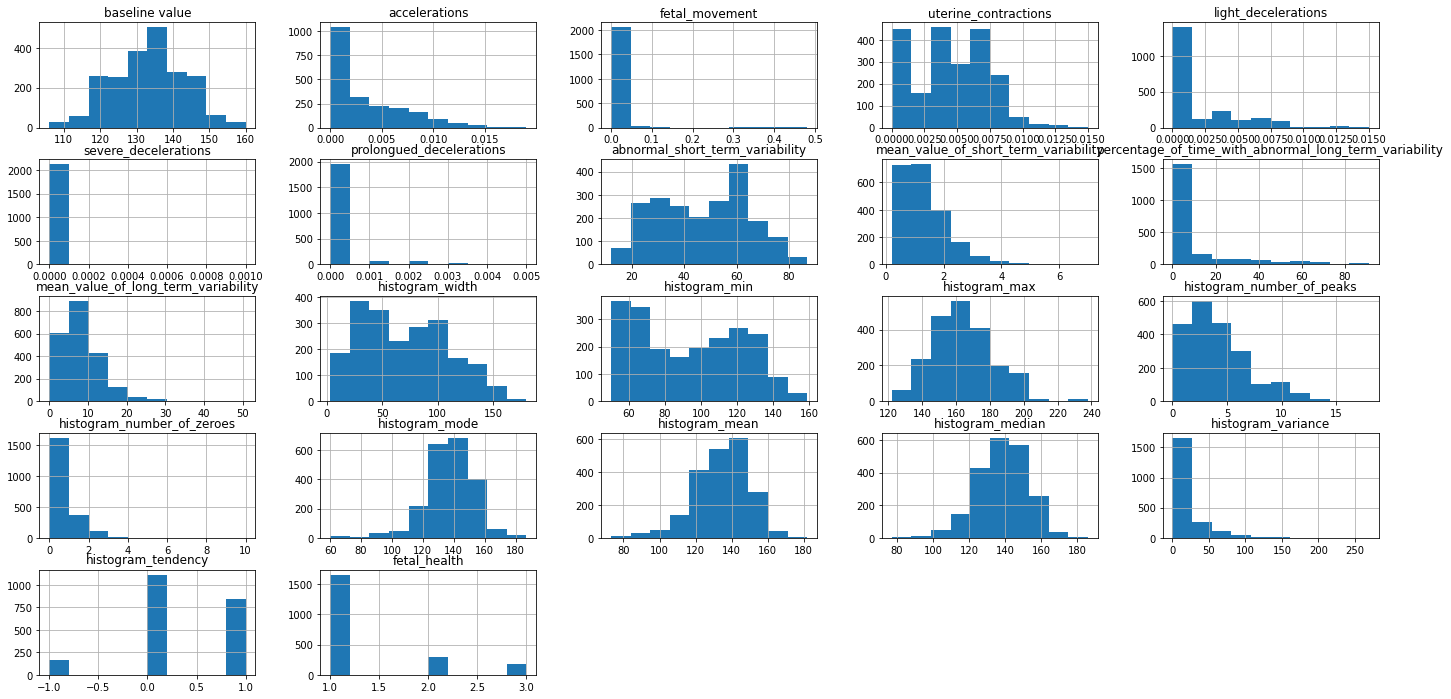

In [11]:
# data visualization
plt.rcParams["figure.figsize"] = (24, 12)
df.hist()

**Data Preprocessing**

In [12]:
# handling missing values
df.isnull().sum()  #No null values

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [13]:
# To check duplicated values
print(df.duplicated().value_counts()) 

False    2113
True       13
dtype: int64


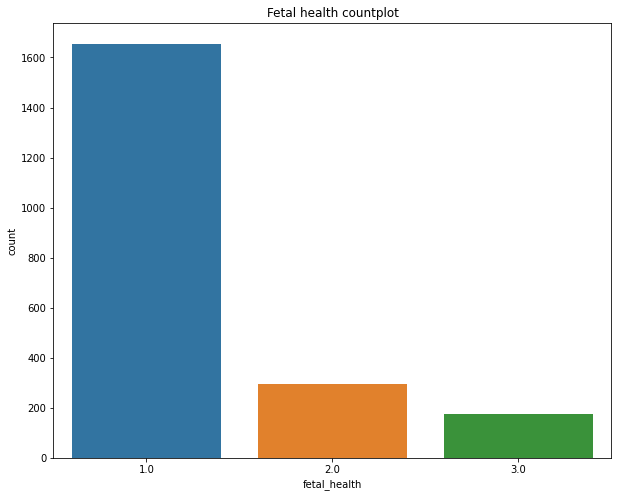

In [15]:
# To check class imbalance

import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 8)
df['fetal_health'].value_counts()
sns.countplot(x='fetal_health', data=df)
plt.title("Fetal health countplot")
plt.show()

In [16]:
corr = df.corr()
corr

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [19]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('fetal_health', axis=1))
scaled_features = scaler.transform(df.drop('fetal_health', axis=1))
df_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


In [20]:
# Test, Train Split
from sklearn.model_selection import train_test_split
X= df_scaled
y= df['fetal_health']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

# **Decision Tree Algorithm**

In [22]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree_fit = dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test,pred_dtree))

Decision Tree Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       501
         2.0       0.79      0.73      0.76        86
         3.0       0.92      0.90      0.91        51

    accuracy                           0.93       638
   macro avg       0.89      0.87      0.88       638
weighted avg       0.93      0.93      0.93       638



[[484  15   2]
 [ 21  63   2]
 [  3   2  46]]


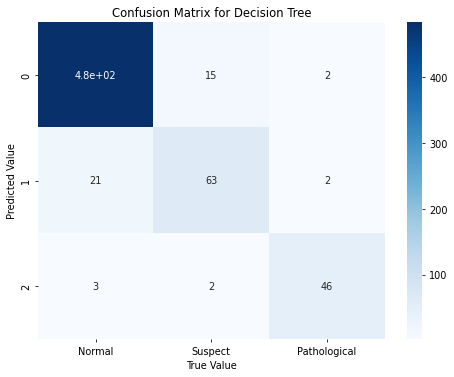

In [23]:
fig = plt.figure(figsize=(8,6), dpi=70)
d=confusion_matrix(y_test,pred_dtree)
print(d)
ax = sns.heatmap(d, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.set_title("Confusion Matrix for Decision Tree")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
fig.savefig('Dtree con matrix.png', bbox_inches= 'tight', pad_inches = 0.5)

# **Random Forest Algorithm**

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=100)
rfc_fit = rfc.fit(X_train,y_train)
pred_rfc=rfc.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test,pred_rfc))

Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.96      1.00      0.98       501
         2.0       0.96      0.76      0.84        86
         3.0       0.96      0.94      0.95        51

    accuracy                           0.96       638
   macro avg       0.96      0.90      0.92       638
weighted avg       0.96      0.96      0.96       638



[[499   2   0]
 [ 19  65   2]
 [  2   1  48]]


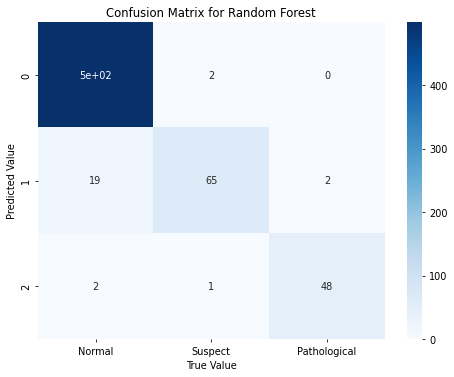

In [25]:
fig = plt.figure(figsize=(8,6), dpi=70)
d=confusion_matrix(y_test,pred_rfc)
print(d)
ax = sns.heatmap(d, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.set_title("Confusion Matrix for Random Forest")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
fig.savefig('RanForest con matrix.png', bbox_inches= 'tight', pad_inches = 0.5)

# **K-Nearest Neighbours (KNN) Algorithm**

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
knn_fit = knn.fit(X_train,y_train)
pred_knn = knn.predict(X_test)
print("K-Nearest Neighbours (KNN) Classification Report:\n", classification_report(y_test,pred_knn))

K-Nearest Neighbours (KNN) Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.96      0.95       501
         2.0       0.69      0.72      0.70        86
         3.0       0.93      0.82      0.87        51

    accuracy                           0.91       638
   macro avg       0.86      0.83      0.84       638
weighted avg       0.92      0.91      0.91       638



[[479  22   0]
 [ 21  62   3]
 [  3   6  42]]


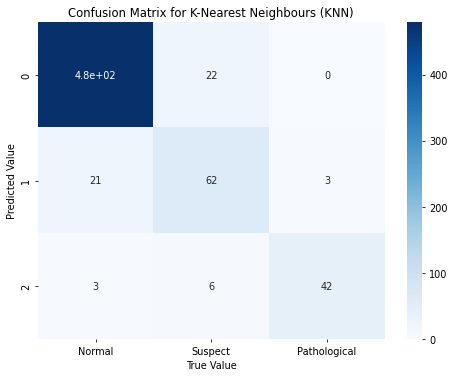

In [28]:
fig = plt.figure(figsize=(8,6), dpi=70)
d=confusion_matrix(y_test,pred_knn)
print(d)
ax = sns.heatmap(d, annot=True, cmap='Blues');
ax.set_xlabel('True Value')
ax.set_ylabel('Predicted Value')
ax.set_title("Confusion Matrix for K-Nearest Neighbours (KNN)")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])
fig.savefig('KNN con matrix.png', bbox_inches= 'tight', pad_inches = 0.5)

# **Results**

Accuracy of Decision Tree - 93%

Accuracy of Random Forest - 96%

Accuracy of K-Nearest Neighbours (KNN) - 91% 

Random Forest outperforms the rest algorithms for this Dataset.